In [ ]:
# This code was written by Justine Kuczera of Queen's University, Kingston Ontario

In [ ]:

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import time
from numba import jit

In [ ]:
def hexa(n_rings,radius):
    #width and height of the hexagon
    w = radius*2/np.sqrt(3)
    h = radius
    N = int(n_rings/2)

    #generate empty arrays
    central_x = []
    central_y = []
    edge_x = []
    edge_y = []

    if (n_rings%2==1):
        print("n_rings must be even number")
    else:
        #top edge atom layer
        edge_x.append(0)
        edge_y.append(0)
        for i in range(N):
            edge_x.append(edge_x[-1]+1.5*w)
            edge_y.append(edge_y[-1])

        #first half of hexagon
        for i in range(N):
            central_x.append(edge_x[0]+0.75*w)
            central_y.append(edge_y[0]-0.5*h)
            for j in range(N -1 +i):
                central_x.append(central_x[-1]+1.5*w)
                central_y.append(central_y[-1])
            central_x.append(edge_x[0])
            central_y.append(edge_y[0]-h)
            for j in range(N+i):
                central_x.append(central_x[-1]+1.5*w)
                central_y.append(central_y[-1])
            edge_x.insert(0,edge_x[0]-0.75*w)
            edge_y.insert(0,edge_y[0]-1.5*h)
            central_x.append(edge_x[0]+1.5*w)
            central_y.append(edge_y[0])
            for j in range(N -1 +i):
                central_x.append(central_x[-1]+1.5*w)
                central_y.append(central_y[-1])
            edge_x.append(central_x[-1]+1.5*w)
            edge_y.append(central_y[-1])

        #second half of hexagon
        for i in range(N-1):
            central_x.append(edge_x[0]+0.75*w)
            central_y.append(edge_y[0]-0.5*h)
            for j in range(N+(N-i)-1):
                central_x.append(central_x[-1]+1.5*w)
                central_y.append(central_y[-1])
            central_x.append(edge_x[0]+1.5*w)
            central_y.append(edge_y[0]-h)
            for j in range(N+(N-i)-2):
                central_x.append(central_x[-1]+1.5*w)
                central_y.append(central_y[-1])
            edge_x.insert(0,edge_x[0]+0.75*w)
            edge_y.insert(0,edge_y[0]-1.5*h)
            central_x.append(edge_x[0]+1.5*w)
            central_y.append(edge_y[0])
            for j in range(N +(N-i)-3):
                central_x.append(central_x[-1]+1.5*w)
                central_y.append(central_y[-1])
            edge_x.append(central_x[-1]+1.5*w)
            edge_y.append(central_y[-1])
        central_x.append(edge_x[0]+0.75*w)
        central_y.append(edge_y[0]-0.5*h)
        for j in range(N):
            central_x.append(central_x[-1]+1.5*w)
            central_y.append(central_y[-1])
        central_x.append(edge_x[0]+1.5*w)
        central_y.append(edge_y[0]-h)
        for j in range(N-1):
            central_x.append(central_x[-1]+1.5*w)
            central_y.append(central_y[-1])
        edge_x.append(edge_x[0]+0.75*w)
        edge_y.append(edge_y[0]-1.5*h)
        for i in range(N):
            edge_x.append(edge_x[-1]+1.5*w)
            edge_y.append(edge_y[-1])

        #center of mass back to 0
        edge_x -= np.average(edge_x)
        edge_y -= np.average(edge_y)
        central_x -= np.average(central_x)
        central_y -= np.average(central_y)

        #NEW - MERGE EDGE AND CENTRAL
        central_x = np.concatenate((central_x,edge_x))
        central_y = np.concatenate((central_y,edge_y))

        #NEW - EDGE ATOMS
        edge_x = []
        edge_y = []

        edge_x.append(n_rings*0.75*w+0.5*w)
        edge_y.append(0)

        edge_x.append(edge_x[-1]-0.5*w)
        edge_y.append(edge_y[-1]-h)
        for i in range(N-1):
            edge_x.append(edge_x[-1]-0.75*w)
            edge_y.append(edge_y[-1]-1.5*h)
        edge_x.append(edge_x[-1]-0.5*w)
        edge_y.append(edge_y[-1]-h)

        edge_x.append(edge_x[-1]-w)
        edge_y.append(edge_y[-1])
        for i in range(N-1):
            edge_x.append(edge_x[-1]-1.5*w)
            edge_y.append(edge_y[-1])
        edge_x.append(edge_x[-1]-w)
        edge_y.append(edge_y[-1])

        edge_x.append(edge_x[-1]-0.5*w)
        edge_y.append(edge_y[-1]+h)
        for i in range(N-1):
            edge_x.append(edge_x[-1]-0.75*w)
            edge_y.append(edge_y[-1]+1.5*h)
        edge_x.append(edge_x[-1]-0.5*w)
        edge_y.append(edge_y[-1]+h)

        edge_x.append(edge_x[-1]+0.5*w)
        edge_y.append(edge_y[-1]+h)
        for i in range(N-1):
            edge_x.append(edge_x[-1]+0.75*w)
            edge_y.append(edge_y[-1]+1.5*h)
        edge_x.append(edge_x[-1]+0.5*w)
        edge_y.append(edge_y[-1]+h)

        edge_x.append(edge_x[-1]+w)
        edge_y.append(edge_y[-1])
        for i in range(N-1):
            edge_x.append(edge_x[-1]+1.5*w)
            edge_y.append(edge_y[-1])
        edge_x.append(edge_x[-1]+w)
        edge_y.append(edge_y[-1])

        edge_x.append(edge_x[-1]+0.5*w)
        edge_y.append(edge_y[-1]-h)
        for i in range(N-1):
            edge_x.append(edge_x[-1]+0.75*w)
            edge_y.append(edge_y[-1]-1.5*h)

    return central_x,central_y,edge_x,edge_y

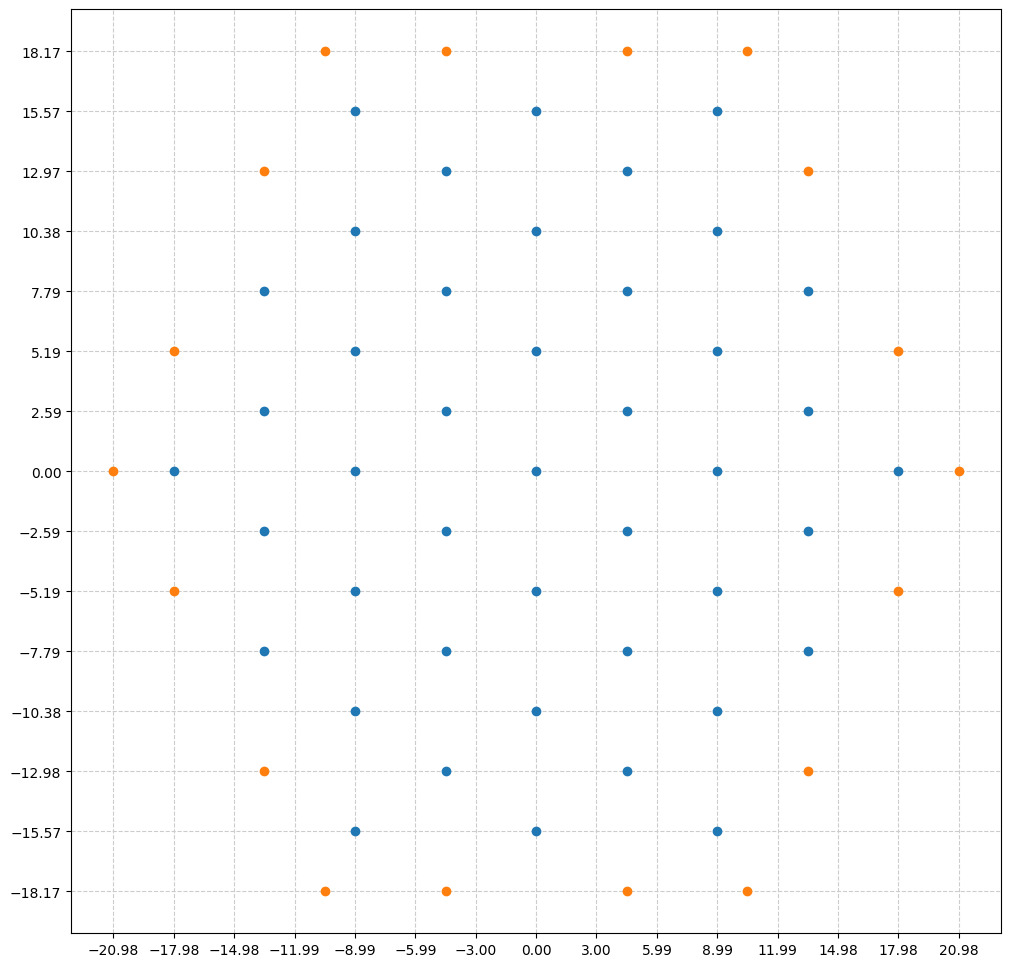

In [ ]:
radius = 5.19

x,y,xx,yy = hexa(4,radius)

fig,ax = plt.subplots(figsize=(12,12))
plt.plot(x,y,"o")
plt.plot(xx,yy,"o")
ax.xaxis.set_major_locator(MultipleLocator(radius/np.sqrt(3)))
ax.yaxis.set_major_locator(MultipleLocator(radius/2))
ax.grid(which='major', color='#CCCCCC', linestyle='--')

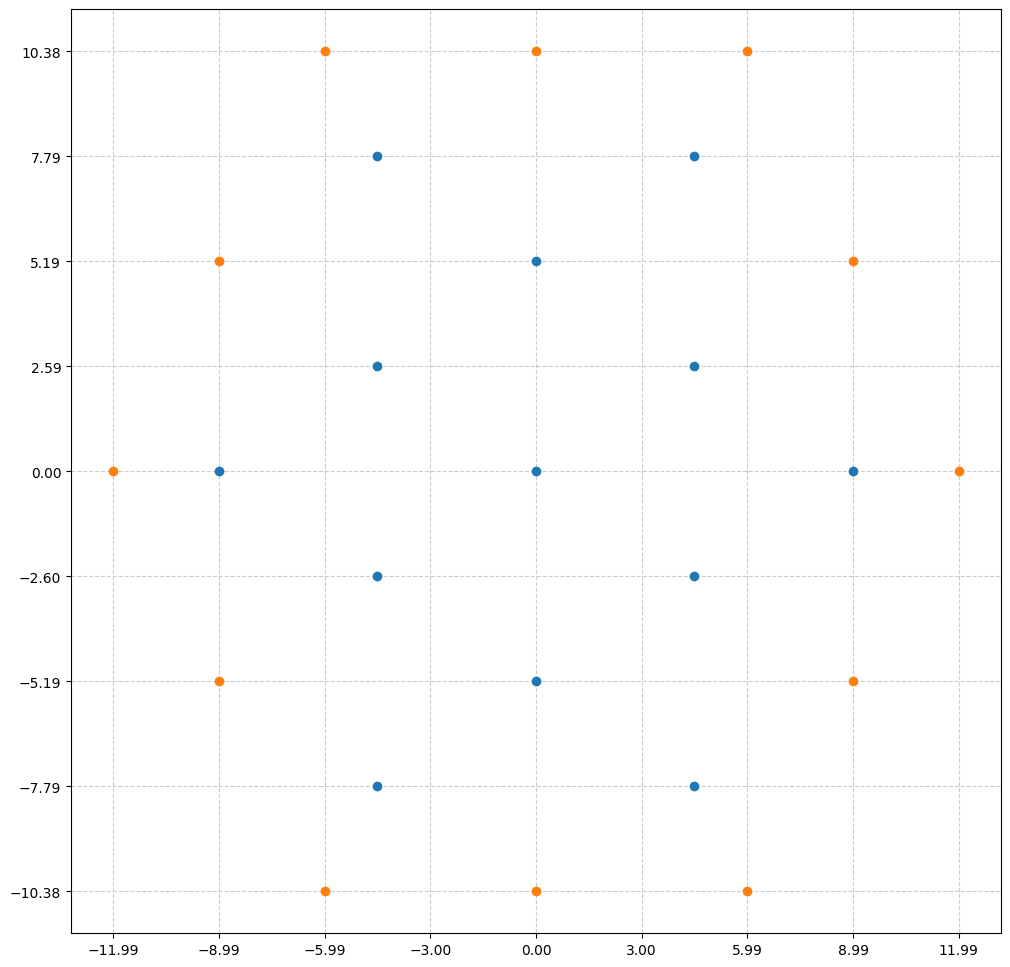

In [ ]:
radius = 5.19

x,y,xx,yy = hexa(2,radius)

fig,ax = plt.subplots(figsize=(12,12))
plt.plot(x,y,"o")
plt.plot(xx,yy,"o")
ax.xaxis.set_major_locator(MultipleLocator(radius/np.sqrt(3)))
ax.yaxis.set_major_locator(MultipleLocator(radius/2))
ax.grid(which='major', color='#CCCCCC', linestyle='--')

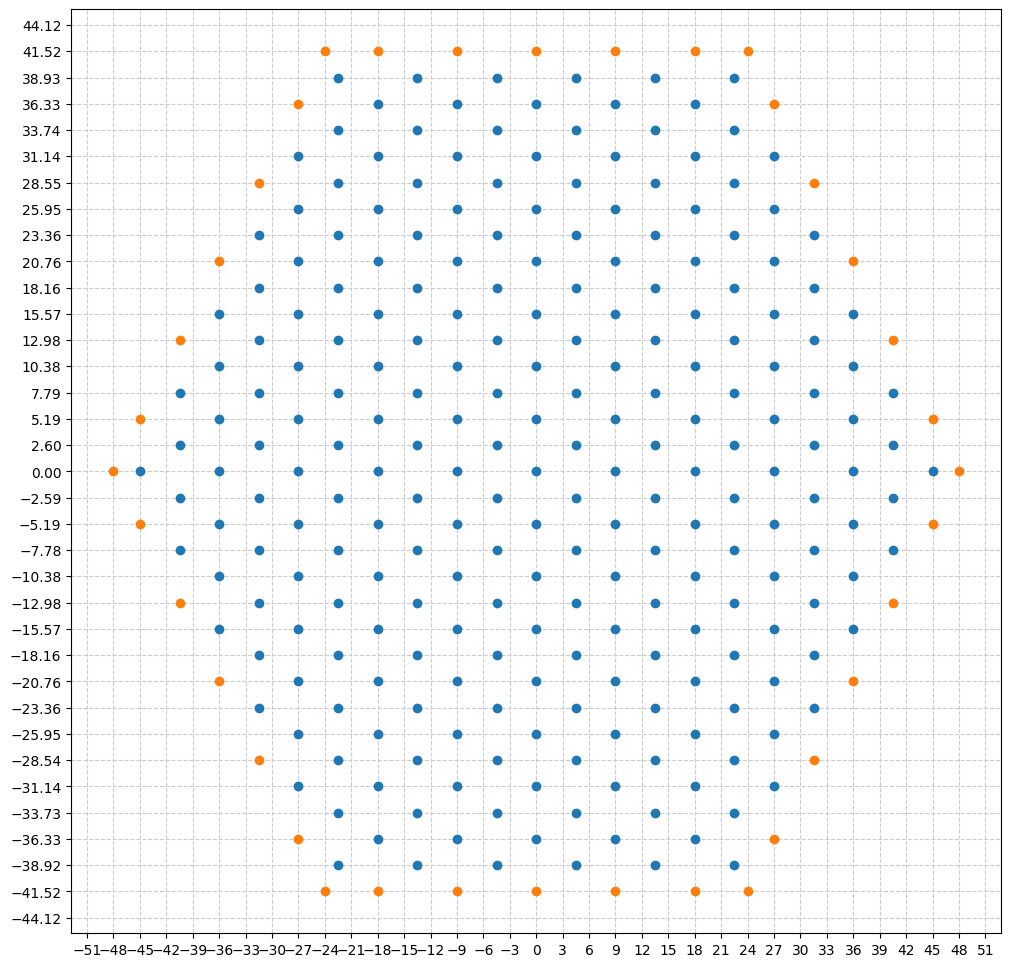

In [ ]:
radius = 5.19

x,y,xx,yy = hexa(10,radius)

fig,ax = plt.subplots(figsize=(12,12))
plt.plot(x,y,"o")
plt.plot(xx,yy,"o")
ax.xaxis.set_major_locator(MultipleLocator(radius/np.sqrt(3)))
ax.yaxis.set_major_locator(MultipleLocator(radius/2))
ax.grid(which='major', color='#CCCCCC', linestyle='--')